# 02 Dof-Analysis

In Chapter 1 we learned how to classify models based on their mathematical structure which is an important first step in determining what kind numerical methods are suitable to solve them. In this chapter we take the next step of determining the degrees of freedom (DOF) of a model, identifying important concepts such as variables, parameters, constraints and understanding how this analysis can be used to determine the type of problem we are trying to solve: determined vs. under/over-determined problems). Determined problems are "solvable" in the sense that they can usually be simulated (with either a dynamic or static solution as output) using numerical methods. Underdetermined are also solvable, and are commonly encountered as optimization problems (which will be discussed in depth in Chapters 7-9). Models for systems developed by engineers will typically start out as underdetermined before parameters are optimized or control loops are added (Chapters 10-13). Overdetermined problems are typically not solvable directly as a simulation, but instead of commonly associated with data and machine learning problems requiring methods such as least-squares got fit models (which will be discussed in Chapter 6).

Modelling is a fundamental skill in engineering and science, especially the ability to derive models from first principles. This typically involves applying conservation laws (mass, energy, momentum, charge, force) to a system or other -discipline dependent- engineering principles and deriving equations that describe the system's behavior. In this chapter we will also discuss how to derive models from these principles in preparation for the more advanced topics in later chapters. As discussed in Chapter 1 mathematical models will inherently be a compromise between how accurately the model represents the real underlying system's complexity and the cost and effort required to: (i) develop the model, (ii) validate the model and (iii) solve the model using numerical methods. Finding the right balance between these competing factors is an art as much as a science and will require experience and judgement from the practicing engineer.


## 1. Degrees of freedom (DOF) analysis, constraints

The degrees of freedom $N_F$ can be computed with the following formula:

$$N_F = N_V - N_E$$

where $N_V$ is the total number of variables and $N_E$ the total number of independent equations. The table below summarizes the different types of problems based on the DOF value:


| DOF Value | Problem Type    | Description                                                                 | Examples                                                                 |
|-----------|-----------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------|
| $N_F = 0$ | Determined      | Equal variables and equations; unique solution typically exists.            | Solving for steady-state temperature in a heat exchanger with fixed inputs. |
| $N_F > 0$ | Underdetermined | More variables than equations; infinite solutions possible; often optimized to find best fit. | Design optimization of a satellite's thrust vector where multiple configurations satisfy basic constraints. |
| $N_F  < 0$            | Overdetermined  | More equations than variables; no exact solution, but can use approximation methods like least-squares. | Fitting experimental data to a model with redundant measurements, e.g., multiple sensors on a rocket's trajectory. |


There is a further important distinction to be made between variables and parameters. Variables are quantities that can change during the operation of the system, while parameters are typically fixed values that define the system's characteristics. For example, in a thermal system, temperature and pressure might be variables, while material properties like thermal conductivity or specific heat capacity are parameters. Parameters can often be adjusted during the design phase but remain constant during operation. In this course variables are typically donated with $x_i$ (for independent static variables) and $y_i$ (for dynamic variables), while parameters are donated with $p_i$. Just as in Chapter 1, it is often helpful in DOF analysis to rewrite equations and variables in such a standardized form to increase clarity as shown in the example below.

> ### Example: Counting DOF in a differential-algebraic equation (DAE) system
>
>To illustrate DOF analysis for a non-linear differential-algebraic equation (DAE) system, we develop a toy model for a quadcopter drone with 4 rotors. The model includes the total vertical force balance, non-linear thrust equations for each rotor, input equations for rotor speeds as a linear ramp function (with gain and bias) from the electrical signals provided by the drone operator, and moment balance constraints for stable hover (setting roll, pitch, and yaw moments to zero). The system is non-linear due to the quadratic relationship in the thrust equations. Inputs $ u_i $ are treated as fixed parameters for this static analysis (though in a full simulation, they could vary with time). The moment balances are algebraic constraints that ensure no net torque, essential for hover; however, they may render the system inconsistent unless the inputs $ u_i $ are selected to satisfy them (e.g., via control logic in later chapters).
> Equations with original symbols:
>
>(1)$~~~$ $ m \frac{dv}{dt} = T_1 + T_2 + T_3 + T_4 - m g ~~$ (total force balance) <br>
>(2)$~~~$ $ T_1 = k \omega_1^2 ~~$   (thrust for rotor 1) <br>
>(3)$~~~$ $ T_2 = k \omega_2^2 ~~$   (thrust for rotor 2) <br>
>(4)$~~~$ $ T_3 = k \omega_3^2 ~~$   (thrust for rotor 3) <br>
>(5)$~~~$ $ T_4 = k \omega_4^2 ~~$   (thrust for rotor 4) <br>
>(6)$~~~$ $ \omega_1 = \text{gain} \cdot u_1 + \text{bias} ~~$   (ramp input for rotor 1) <br>
>(7)$~~~$ $ \omega_2 = \text{gain} \cdot u_2 + \text{bias} ~~$   (ramp input for rotor 2) <br>
>(8)$~~~$ $ \omega_3 = \text{gain} \cdot u_3 + \text{bias} ~~$   (ramp input for rotor 3) <br>
>(9)$~~~$ $ \omega_4 = \text{gain} \cdot u_4 + \text{bias} ~~$   (ramp input for rotor 4) <br>
>(10)$~~$ $ \omega_4^2 - \omega_2^2 = 0 ~~$   (roll moment balance: $ M_x = 0 $, normalized assuming arm length $ l = 1 $) <br>
>(11)$~~$ $ \omega_3^2 - \omega_1^2 = 0 ~~$   (pitch moment balance: $ M_y = 0 $, normalized) <br>
>(12)$~~$ $ \omega_1^2 + \omega_3^2 - \omega_2^2 - \omega_4^2 = 0 ~~$ (yaw moment balance: $ M_z = 0 $, normalized assuming torque-to-thrust ratio $ d = 1 $) <br>
>
> This system is already relatively complicated due to containing many symbols which are coupled in the different equations. The first step is to define how each of the symbols and equations fit into our standard nomenclature, which we can do below:
>
> **Dynamic variables:**  <br>
>
>   $ y_1(t) = v(t) $ (vertical velocity). <br>
>
> **Algebraic variables:** <br>
>
> $ x_1 = T_1, ~x_2 = T_2, ~x_3 = T_3,~ x_4 = T_4$, <br>
> $ x_5 = \omega_1,~ x_6 = \omega_2,~ x_7 = \omega_3,~ x_8 = \omega_4 $. <br>
>
> **Parameters:**  <br>
>
> $ p_1 = m $ (mass),  <br>
> $ p_2 = g $ (gravity),  <br>
> $ p_3 = k $ (thrust coefficient), <br>
> $ p_4 = $ gain for ramp,  <br>
> $ p_5 = $ bias for ramp. <br>
>
> **Inputs (treated as parameters):**   <br>
>
> $ u_1, u_2, u_3, u_4 $ (electrical signals to each rotor). <br>
>
> The equations, rewritten in standard from are: <br>
>
> $ \dot{y_1} = \left( x_1 + x_2 + x_3 + x_4 - p_1 p_2 \right) / p_1 $ (total force balance) <br>
$ 0 = x_1 - p_3 x_5^2 $ (thrust for rotor 1) <br>
$ 0 = x_2 - p_3 x_6^2 $ (thrust for rotor 2) <br>
$ 0 = x_3 - p_3 x_7^2 $ (thrust for rotor 3) <br>
$ 0 = x_4 - p_3 x_8^2 $ (thrust for rotor 4) <br>
$ 0 = x_5 - p_4 u_1 - p_5 $ (ramp input for rotor 1) <br>
$ 0 = x_6 - p_4 u_2 - p_5 $ (ramp input for rotor 2) <br>
$ 0 = x_7 - p_4 u_3 - p_5 $ (ramp input for rotor 3) <br>
$ 0 = x_8 - p_4 u_4 - p_5 $ (ramp input for rotor 4) <br>
$ 0 = x_8^2 - x_6^2 $ (roll moment balance) <br>
$ 0 = x_7^2 - x_5^2 $ (pitch moment balance) <br>
$ 0 = x_5^2 + x_7^2 - x_6^2 - x_8^2 $ (yaw moment balance) <br>
>
> With this organization it already becomes clear that we have do not have 12 indepenent equations, in instead, after substitution we find there are only 9 independent equations. So we have:
>
> $N_E = 9~~~$     (number of independent equations) <br>
>
> The total number of variables (1 $y_i$ dynamic variables and 8 $x_i$ independent variables) is:
>
> $N_V = 9~~~$     (number of variables, also computed from 18 symbols - 5 parameters - 4 inputs = 9) <br>
>
> Therefore the degrees of freedom is:
>
> $N_F = N_V - N_E = 9 - 9 = 0~~~$ (determined problem) <br>
>
> And we know that we can simulate this system.


>  ### Example: Counting DOF of a system using python
>
> The above worked example can also be analysised using computational tools like sympy to determine the rank of the Jacobian matrix of the system of equations which automatically tells you how many independent equations you have. The code below shows how to do this in python in the original symbols, confirming that the system is determined with $N_F = 0$:

In [3]:
import sympy as sp

# Define symbolic parameters
m, g, k, p1, p2, u1, u2, u3, u4 = sp.symbols('m g k p1 p2 u1 u2 u3 u4')

# Define symbolic variables
dvdt, T1, T2, T3, T4, omega1, omega2, omega3, omega4 = sp.symbols('dvdt T1 T2 T3 T4 omega1 omega2 omega3 omega4')

# Define residuals F = 0
F1 = m * dvdt - (T1 + T2 + T3 + T4 - m * g)
F2 = T1 - k * omega1**2
F3 = T2 - k * omega2**2
F4 = T3 - k * omega3**2
F5 = T4 - k * omega4**2
F6 = omega1 - p1 * u1 - p2
F7 = omega2 - p1 * u2 - p2
F8 = omega3 - p1 * u3 - p2
F9 = omega4 - p1 * u4 - p2
F10 = omega4**2 - omega2**2  # roll moment = 0
F11 = omega3**2 - omega1**2  # pitch moment = 0
F12 = omega1**2 + omega3**2 - omega2**2 - omega4**2  # yaw moment = 0

F = sp.Matrix([F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12])

# Variables for Jacobian
vars_list = [dvdt, T1, T2, T3, T4, omega1, omega2, omega3, omega4]

# Compute Jacobian and its rank
J = F.jacobian(vars_list)
rank = J.rank()

# Compute DOF
N_E_effective = rank
N_V = len(vars_list)
N_F = N_V - N_E_effective

# Output
print(f"Rank of Jacobian (effective N_E): {rank}")
print(f"Number of variables (N_V): {N_V}")
print(f"Degrees of freedom (N_F): {N_F}")
print("Since N_F = 0, this is a determined system.")

Rank of Jacobian (effective N_E): 9
Number of variables (N_V): 9
Degrees of freedom (N_F): 0
Since N_F = 0, this is a determined system.


## 2. Conservation rules & force balances

In the first part of this chapter we classified models that were already established. In this section we focus on how models are derived from engineering principles in the first place. Common principles for modelling systems derive from conservation laws. These are typically balances of:

- Mass
- Energy
- Momentum
- Charge
- Force

And so forth. Developing models from these principles is a key skill in engineering and typically draws from background knowledge and experience of the practicing engineer. In general conservative quantities (e.g. total mass) can be described with the following general balance equation over a fixed domain in space (control volume):

$$ \{ \text{Accumulation} \} = \{ \text{Inflow} \} - \{ \text{Outflow} \} $$

For non-conservative quantities (e.g. concentration, entropy) the balance equation includes generation and consumption terms:

$$ \{ \text{Accumulation} \} = \{ \text{Inflow} \} - \{ \text{Outflow} \} + \{ \text{Generation} \} - \{ \text{Consumed} \} $$

### Examples of conservation laws & force balances

The simplest demonstration of a conservation law is the mass balance around a liquid tank

> #### **Example: Liquid tank level of a draining water tank**
>
> Suppose we start with a water tank that is initially full. We use the _variable_ $h$ to define the height of the water in the tank. The initial height of the water level is $h=2.0$ m.
>
>
>
> <img src="../images/2_1_tank_full.svg"
     alt="A full water tank"
     width="240">
>
>
> The icon:<img src="Control_valve.svg" width="30"> is a valve which lets you turn the flow of water on/off. The two valves into and out of the tank determines the flow rates _in_ ($q_{in}$) and _out_ ($q_{out}$) of the tank. When they are both closed the height of the tank $h$ cannot change over time.
> The accumlation of water in the tank over time can be defined as a dynamic variable $m(t)$ from which we can get the tank height $h(t) = \frac{m(t)}{/rho A}$ using the parameters for the density of water $\rho$ and the cross-sectional area of the tank $A$, gives us the accumulation term over time in terms of our hieght variable:
>
> $$ \{ \text{Accumulation} \} = \frac{1}{\rho A}\frac{d h}{ dt} $$
>
> The remaining inflow and outflow terms are defined simply as:
> $$ \{ \text{Inflow} \} = q_1  $$
> $$\{ \text{Outflow} \} = q_2 $$
>
> Result in the simple ODE:
>
> $$ \frac{1}{\rho A}\frac{d h}{ dt} = q_1 - q_2 $$
>
> In standard form:
>
> $$ \frac{d y_1}{ dt} = p_1 p_1 (u_1 - u_2) $$
>
> For example, suppose we define the inputs as $u_1(t) = 0~~~\forall t$, $u_2(t) = 0.00001~~~\forall t$ (i.e. the outflow valve is open and draining constantly and the inflow valve is closed). The parameters are $p_1 = 1000$ kg/m$^3$ (density of water) and $p_2 = 1$ m$^2$ (cross-sectional area of tank). The initial condition is $h(0) = 2.0$ m. We can simulate this system in python as follows:

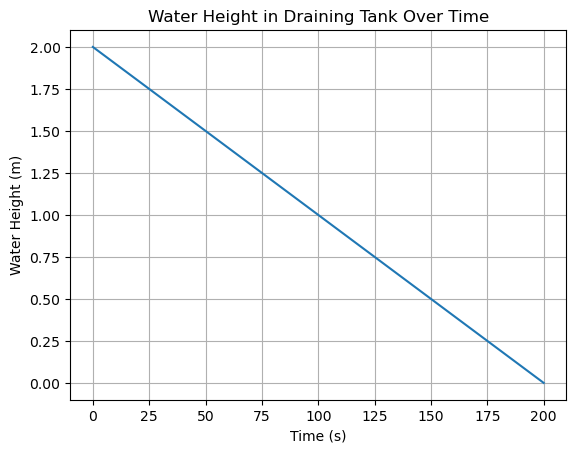

In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Define parameters
p_1 = 1000.0  # Density of water (kg/m^3)
p_2 = 1.0     # Cross-sectional area of tank (m^2
# Define input functions
def u_1(t):
    return 0.0  # Inflow rate (m^3/s), valve closed

def u_2(t):
    return 0.00001  # Outflow rate (m^3/s), valve open

# Define the ODE
def dh_dt(h, t):
    if h > 0:
        return p_1 * p_2 * (u_1(t) - u_2(t))
    else:
        return 0.0  # Physical constraint: height cannot be negative

# Initial condition and time span
h_0 = 2.0  # The initial height of the water tank
t = np.arange(0.0, 200.0, 0.01)  # The timespan that we want to simulated (200 seconds, interpolated every 0.01 seconds)

# Solve the ODE
h = sp.integrate.odeint(dh_dt, h_0, t)

# Plot the results
plt.plot(t, h)
plt.xlabel('Time (s)')
plt.ylabel('Water Height (m)')
plt.title('Water Height in Draining Tank Over Time')
plt.grid()


>This gives us the simple linear draining of the tank over time, of course, real life is more complicated with non-linear flow rates, so for example in a real system there would be second equation for the outflow rate (which increases with pressure due to the amount of water in the tank) $q_2 = C_d A_o \sqrt{2 g h}$ where $C_d$ is a discharge coefficient, $A_o$ is the area of the outlet and $g$ is the acceleration due to gravity. This would make the ODE non-linear and more difficult to solve, but the principle of deriving the model from a conservation law remains the same. The system of equations would then become:
>
>$$ \frac{1}{\rho A}\frac{d h}{ dt} = q_1 - q_2 $$
>
>$$q_2(h) = C_d A_o \sqrt{2 g h} $$
>
>In standard form:
>
>$$ \frac{d y_1}{ dt} = p_1 p_1 (u_1 - x_1) $$
>$$ 0 = x_1 - p_2 p_3 \sqrt{p_4 y_1} $$  (NOTE: $u_2$ is no longer an input, but a variable $x_1$)
>
>Let's now count the DOF of this non-linear system:
>
>The number of variables is:
>
>$$N_V = 2~~~$$     (1 dynamic variable $y_1 = h$ and 1 algebraic variable $x_1 = q_2$) <br>
>The number of independent equations is:
>
>$$N_E = 2~~~$$     (1 ODE and 1 algebraic equation) <br>
>
>Therefore the degrees of freedom is:
>
>$$N_F = N_V - N_E = 2 - 2 = 0~~~$$ (determined problem) <br>
>
>Therefore we know that we can simulate this system. Now let's implement this in python:

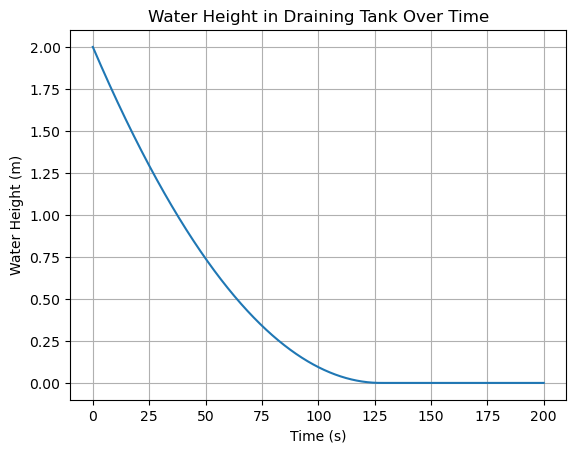

In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Define parameters
p_1 = 1000.0  # rho, density of water (kg/m^3)
p_2 = 1.0     # A, Cross-sectional area of tank (m^2)
C_d = 0.0005  # Discharge coefficient
A_o = 0.01    # Area of outlet (m^2)
g = 9.81      # Acceleration due to gravity (m/s^2)

# Define input functions
def u_1(t):
    return 0.0  # Inflow rate (m^3/s), valve closed

def x_1(h):
    return C_d * A_o * np.sqrt(2 * g * h) if h > 0 else 0.0  # Outflow rate (m^3/s)

# Define the ODE
def dh_dt(h, t):
    if h > 0:
        return p_1 * p_2 * (u_1(t) - x_1(h))
    else:
        return 0.0  # Physical constraint: height cannot be negative

# Initial condition and time span
h_0 = 2.0  # The initial height of the water tank
t = np.arange(0.0, 200.0, 0.01)  # The timespan that we want to simulated (200 seconds, interpolated every 0.01 seconds)

# Solve the ODE
h = sp.integrate.odeint(dh_dt, h_0, t)

# Plot the results
plt.plot(t, h)
plt.xlabel('Time (s)')
plt.ylabel('Water Height (m)')
plt.title('Water Height in Draining Tank Over Time')
plt.grid()


> You can play around with this simulation below to get more comfortable with the idea of time dependent inputs, dynamic variables and their relation to constraints etc. For example try changing the initial conditions, valve coefficients or adding an input flow rate which starts at t>100 seconds to see how the system responds:

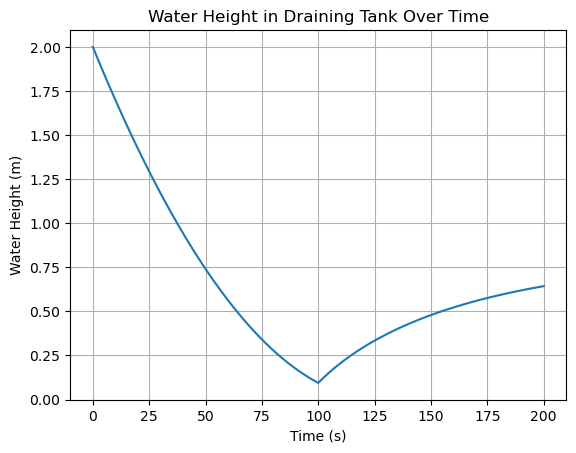

In [17]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Define parameters
p_1 = 1000.0  # rho, density of water (kg/m^3)
p_2 = 1.0     # A, Cross-sectional area of tank (m^2)
C_d = 0.0005  # Discharge coefficient
A_o = 0.01    # Area of outlet (m^2)
g = 9.81      # Acceleration due to gravity (m/s^2)

# Define input functions
def u_1(t):
    if t > 100:
        return 0.00002  # Inflow rate (m^3/s), valve open after 100s
    else:
        return 0.0  # Inflow rate (m^3/s), valve closed

def x_1(h):
    return C_d * A_o * np.sqrt(2 * g * h) if h > 0 else 0.0  # Outflow rate (m^3/s)

# Define the ODE
def dh_dt(h, t):
    if h > 0:
        return p_1 * p_2 * (u_1(t) - x_1(h))
    else:
        return 0.0  # Physical constraint: height cannot be negative

# Initial condition and time span
h_0 = 2.0  # The initial height of the water tank
t = np.arange(0.0, 200.0, 0.01)  # The timespan that we want to simulated (200 seconds, interpolated every 0.01 seconds)

# Solve the ODE
h = sp.integrate.odeint(dh_dt, h_0, t)

# Plot the results
plt.plot(t, h)
plt.xlabel('Time (s)')
plt.ylabel('Water Height (m)')
plt.title('Water Height in Draining Tank Over Time')
plt.grid()



## 3. Determined, under and over-determined problems

In Linear Algebra we learned that a system of equations can be classified as determined, underdetermined or overdetermined based on the number of equations and variables. Linear Algebra systems are typically expressed in matrix form as:

$$\mathbf{A} \cdot \mathbf{x} = \mathbf{b}, $$

and this system has a unique solution when the vectors $\mathbf{x}$ and $\mathbf{c}$ contain the same number of elements and the matrix $\mathbf{A}$ is square and nonsingular. If there are more variables than equations then the system is underdetermined and has an infinite number of solutions. If there are more equations than variables then the system is overdetermined and typically has no solution. These concepts can be extended to non-linear systems of equations as well, although the analysis becomes more difficult for larger, more complex static or dynamic systems which could contain hundreds of coupled equations. In any kind of numerical project it is a good idea to keep track of your DOF as you develop your model to ensure that you are working with a solvable system. As long as you regularly perform a DOF analysis you can comfortably add or remove equations and variables as needed to refine your model regardless of the complexity of the system.

In this section we will discuss the three types of problems in more detail and provide examples of each.

### Determined problems


A determined problem occurs when $ N_F = 0 $, meaning the number of independent variables equals the number of equations, leading to a unique solution (assuming the system is well-posed).

> #### Example: Cold gas thruster chamber and tank dynamics
> To illustrate, we use a simplified model for a cold gas thruster chamber and tank dynamics model from space engineering (adapted from Sutton & Biblarz, "Rocket Propulsion Elements," 9th ed.). This models gas flow from a high-pressure tank into a chamber and out through a nozzle, with both inflow and outflow, coupled by the ideal gas equation of state (EOS) for pressures. The system is a non-linear DAE with compressible flow equations.
>
> **Model equations (in original symbols):**
>
> Mass balance for tank:
 >
 > $$ \frac{d m_t}{dt} = - \dot{m}_{in} $$  <br>
 >
 > Mass balance for chamber:
 >
 > $$ \frac{d m_{ch}}{dt} = \dot{m}_{in} - \dot{m}_{out} $$  <br>
 >
 > EOS (equation of state) for tank:
 >
 > $$ P_t = \frac{m_t R T}{V_t} $$  <br>
 >
 > EOS for chamber:
 >
 > $$ P_{ch} = \frac{m_{ch} R T}{V_{ch}} $$  <br>
 >
 > Inflow rate (compressible orifice flow from tank to chamber):
 >
 > $$ \dot{m}_{in} = f(P_t, P_{ch}, A_{in}, \gamma, R, T) $$,  using the isentropic flow formula (choked if $  P_{ch} / P_t \leq (2/(\gamma+1))^{\gamma/(\gamma-1)} $, else subsonic).  <br>
 >
 > Outflow rate (nozzle to vacuum, always choked since $ P_e = 0 $):
 >
 > $$ \dot{m}_{out} = P_{ch} A_t \sqrt{\frac{\gamma}{R T}} \left( \frac{2}{\gamma + 1} \right)^{\frac{\gamma + 1}{2(\gamma - 1)}} $$  <br>
>
> The compressible flow function $ f(P_{up}, P_{down}, A, \gamma, R, T) $ depends on the flow conditions:
>
> If $ P_{down}/P_{up} \leq $ critical ratio: choked: <br>
>
> $ \dot{m} = A P_{up} \sqrt{\frac{\gamma}{R T}} \left( \frac{2}{\gamma + 1} \right)^{\frac{\gamma + 1}{2(\gamma - 1)}} $
>
> Else: subsonic,
>
> $ \dot{m} = A P_{up} \sqrt{\frac{2 \gamma}{R T (\gamma - 1)}} \left[ \left( \frac{P_{down}}{P_{up}} \right)^{2/\gamma} - \left( \frac{P_{down}}{P_{up}} \right)^{(\gamma + 1)/\gamma} \right]^{1/2} $
>
> **Constraints:**
>
> $ m_t \geq 0 $, $ m_{ch} \geq 0 $ (prevent negative mass via event detection).
>
> In _standard nomenclature_:
>
> **Dynamic variables: **
>
> $ y_1(t) = m_t(t) $,  <br>
> $ y_2(t) = m_{ch}(t) $.
>
> **Algebraic variables:**
 >
 > $ x_1 = P_t(t) $,  <br>
  > $ x_2 = P_{ch}(t) $,  <br>
   > $ x_3 = \dot{m}_{in}(t) $,  <br>
   > $ x_4 = \dot{m}_{out}(t) $.
   >
> **Parameters:**
>
> $ p_1 = R $ (specific gas constant),  <br>
> $ p_2 = T $ (temperature),  <br>
 > $ p_3 = V_t $ (tank volume),   <br>
 > $ p_4 = V_{ch} $ (chamber volume),   <br>
 > $ p_5 = A_{in} $ (inlet area),   <br>
 > $ p_6 = A_t $ (throat area),   <br>
 > $ p_7 = \gamma $ (specific heat ratio).
>
>
> **Equations (rewritten in std. form):**
>
> $ \dot{y_1} = -x_3 $  <br>
> $ \dot{y_2} = x_3 - x_4 $  <br>
> $ 0 = x_1 - (y_1 p_1 p_2) / p_3 $  <br>
> $ 0 = x_2 - (y_2 p_1 p_2) / p_4 $  <br>
> $ 0 = x_3 - f(x_1, x_2, p_5, p_7, p_1, p_2) $ (inflow)  <br>
> $ 0 = x_4 - f(x_2, 0, p_6, p_7, p_1, p_2) $ (outflow, always choked)  <br>
>
> Finally let's summarize the DOF analysis in a table:
> | Category     | Items                                                                 |
> |--------------|-----------------------------------------------------------------------|
> | Variables    | \( y_1(t), y_2(t) \) (masses), \( x_1(t), x_2(t) \) (pressures), \( x_3(t), x_4(t) \) (flow rates) |
> | Parameters   | \( p_1 = R, p_2 = T, p_3 = V_i, p_4 = V_{ch}, p_5 = A_{in}, p_6 = A_t, p_7 = \gamma \) |
> | Equations    | 2 ODEs (mass balances), 4 algebraic (EOS and flows)                   |
> | DOF Analysis | \( N_v = 6 \) (variables), \( N_e = 6 \) (equations) ⇒ \( N_f = 0 \) (determined DAE system, solvable via implicit methods; constraints handled in solver). |
>
> In conclusion this is a determined DAE system with \( N_f = 0 \), meaning it has a unique solution given initial conditions and parameters. The model can be simulated using implicit ODE solvers that handle DAEs, such as `scipy.integrate.solve_ivp` with event detection to enforce the non-negativity constraints on masses:


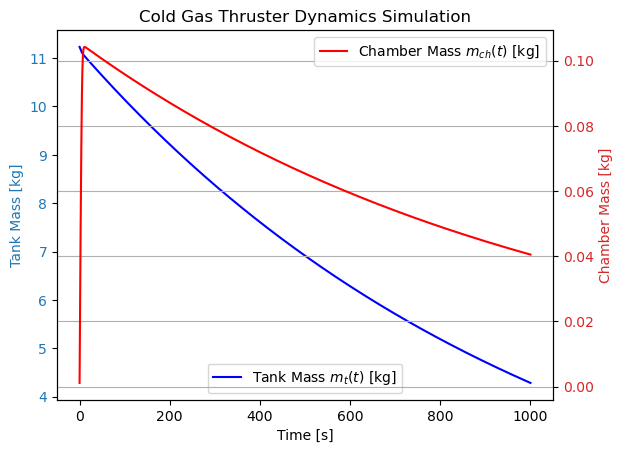

In [39]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters (example values for nitrogen, γ=1.4, R=296.8 J/kgK)
R = 296.8      # Specific gas constant [J/kg K]
T = 300        # Temperature [K]
V_t = 0.1      # Tank volume [m^3]
V_ch = 0.001   # Chamber volume [m^3]
A_in = 1e-6    # Inlet area [m^2]
A_t = 5e-7     # Throat area [m^2]
gamma = 1.4    # Specific heat ratio
P_e = 0        # Exit pressure (vacuum) [Pa]
P_t0 = 1e7     # Initial tank pressure [Pa]
P_ch0 = 1e5    # Initial chamber pressure [Pa]

# Initial masses
m_t0 = P_t0 * V_t / (R * T)
m_ch0 = P_ch0 * V_ch / (R * T)

# Compressible mass flow function
def mass_flow(P_up, P_down, A, gamma, R, T):
    if P_up <= 0:
        return 0.0
    pr = P_down / P_up
    crit_pr = (2 / (gamma + 1)) ** (gamma / (gamma - 1))
    if pr <= crit_pr:
        # Choked
        return A * P_up * np.sqrt(gamma / (R * T)) * (2 / (gamma + 1)) ** ((gamma + 1) / (2 * (gamma - 1)))
    else:
        # Subsonic
        return A * P_up * np.sqrt(2 * gamma / (R * T * (gamma - 1))) * (pr ** (2 / gamma) - pr ** ((gamma + 1) / gamma)) ** 0.5

# ODE function (for y = [m_t, m_ch])
def ode(t, y):
    m_t, m_ch = y
    if m_t < 0:
        m_t = 0
    P_t = m_t * R * T / V_t
    P_ch = m_ch * R * T / V_ch
    m_dot_in = mass_flow(P_t, P_ch, A_in, gamma, R, T)
    m_dot_out = mass_flow(P_ch, P_e, A_t, gamma, R, T)
    return [-m_dot_in, m_dot_in - m_dot_out]

# Event for tank depletion
def tank_depletion(t, y):
    return y[0]  # Zero when m_t = 0
tank_depletion.terminal = True

# Solve
sol = solve_ivp(ode, [0, 1000], [m_t0, m_ch0], rtol=1e-6, atol=1e-6, events=tank_depletion)

# Plot
fig, ax1 = plt.subplots()
ax1.plot(sol.t, sol.y[0], 'b-', label='Tank Mass $m_t(t)$ [kg]')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Tank Mass [kg]', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='lower center')

ax2 = ax1.twinx()
ax2.plot(sol.t, sol.y[1], 'r-', label='Chamber Mass $m_{ch}(t)$ [kg]')
ax2.set_ylabel('Chamber Mass [kg]', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

plt.title('Cold Gas Thruster Dynamics Simulation')
plt.grid(True)
plt.show()

### Underdetermined problems

An underdetermined problem occurs when $ N_F > 0 $, with more variables than equations, resulting in infinitely many solutions; often resolved via optimization to select the "best" one. We will learn a lot more about optimization in later chapters, but for now we will just illustrate the concept with a simple example.

> #### Example: Optimizing thruster nozzle throat area for performance
> For example, consider the thruster model above but remove the constraint on the nozzle throat area $ A_t $ (parameter $ p_6 $), treating it as a free design variable $ x_5 $. This makes the system underdetermined ($ N_V = 7 $, $ N_E = 6 $, $ N_F = 1 $), suitable for optimization—e.g., minimize fuel consumption (integrated $ \dot{m}_{out} $) subject to achieving a required total impulse over a fixed time, or optimize $ A_t $ to maximize thrust efficiency. Here, we use scipy.optimize.minimize to optimize $ A_t $ for a target average thrust (proportional to $ \dot{m}_{out} $) while minimizing chamber pressure variance (to stabilize flow).




Optimized A_t: 5.00e-07 m²


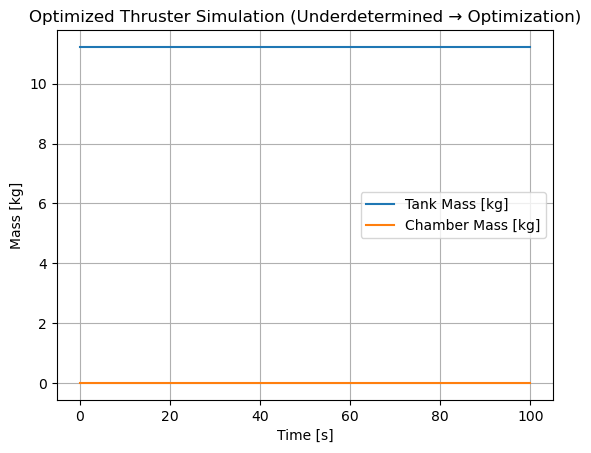

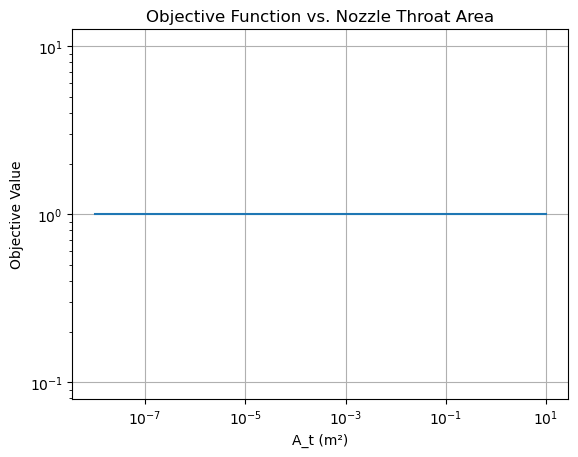

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Parameters (same as above, but A_t is now variable)
R = 296.8
T = 300
V_t = 0.1
V_ch = 0.001
A_in = 1e-6
gamma = 1.4
P_e = 0
P_t0 = 1e7
P_ch0 = 1e5
m_t0 = P_t0 * V_t / (R * T)
m_ch0 = P_ch0 * V_ch / (R * T)

# Vectorized mass flow function
def mass_flow(P_up, P_down, A, gamma, R, T):
    P_up = np.asarray(P_up)
    m_dot = np.zeros_like(P_up)
    idx_pos = P_up > 0
    if not np.any(idx_pos):
        return m_dot
    P_up_pos = P_up[idx_pos]
    pr = P_down / P_up_pos
    crit_pr = (2 / (gamma + 1)) ** (gamma / (gamma - 1))
    choked = pr <= crit_pr
    # Choked flow
    idx_choked = choked
    if np.any(idx_choked):
        m_dot[idx_pos][idx_choked] = A * P_up_pos[idx_choked] * np.sqrt(gamma / (R * T)) * (2 / (gamma + 1)) ** ((gamma + 1) / (2 * (gamma - 1)))
    # Subsonic flow
    idx_sub = ~choked
    if np.any(idx_sub):
        term1 = pr[idx_sub] ** (2 / gamma)
        term2 = pr[idx_sub] ** ((gamma + 1) / gamma)
        m_dot[idx_pos][idx_sub] = A * P_up_pos[idx_sub] * np.sqrt(2 * gamma / (R * T * (gamma - 1)) * (term1 - term2))
    return m_dot

# ODE with variable A_t
def ode(A_t, t_span=[0, 100]):
    def dyn(t, y):
        m_t, m_ch = y
        if m_t < 0:
            m_t = 0
        P_t = m_t * R * T / V_t
        P_ch = m_ch * R * T / V_ch
        m_dot_in = mass_flow(P_t, P_ch, A_in, gamma, R, T)
        m_dot_out = mass_flow(P_ch, P_e, A_t, gamma, R, T)
        return [-m_dot_in, m_dot_in - m_dot_out]
    sol = solve_ivp(dyn, t_span, [m_t0, m_ch0], rtol=1e-6)
    return sol

# Objective: Minimize chamber pressure variance, subject to average thrust ~ target (thrust ~ m_dot_out * v_exit, but simplify to avg m_dot_out)
def objective(A_t, target_avg_mdot=0.001):
    sol = ode(A_t[0])
    P_ch = sol.y[1] * R * T / V_ch
    m_dot_out = mass_flow(P_ch, P_e, A_t[0], gamma, R, T)
    avg_mdot = np.mean(m_dot_out)
    var_pch = np.var(P_ch)
    penalty = 1e6 * (avg_mdot - target_avg_mdot)**2  # Soft constraint
    return var_pch + penalty

# Optimize
res = minimize(objective, [5e-7], bounds=[(1e-8, 1e-5)])
print(f"Optimized A_t: {res.x[0]:.2e} m²")

# Simulate with optimized A_t
sol_opt = ode(res.x[0])
plt.figure()
plt.plot(sol_opt.t, sol_opt.y[0], label='Tank Mass [kg]')
plt.plot(sol_opt.t, sol_opt.y[1], label='Chamber Mass [kg]')
plt.xlabel('Time [s]')
plt.ylabel('Mass [kg]')
plt.title('Optimized Thruster Simulation (Underdetermined → Optimization)')
plt.legend()
plt.grid(True)
plt.show()

# Plot objective function
A_t_vals = np.logspace(-8, -5, 50)
obj_vals = np.array([objective([a]) for a in A_t_vals])
plt.figure()
plt.plot(A_t_vals, obj_vals)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('A_t (m²)')
plt.ylabel('Objective Value')
plt.title('Objective Function vs. Nozzle Throat Area')
plt.grid(True)
plt.show()

In [28]:
np.logspace(-8, -5, 50)

array([1.00000000e-08, 1.15139540e-08, 1.32571137e-08, 1.52641797e-08,
       1.75751062e-08, 2.02358965e-08, 2.32995181e-08, 2.68269580e-08,
       3.08884360e-08, 3.55648031e-08, 4.09491506e-08, 4.71486636e-08,
       5.42867544e-08, 6.25055193e-08, 7.19685673e-08, 8.28642773e-08,
       9.54095476e-08, 1.09854114e-07, 1.26485522e-07, 1.45634848e-07,
       1.67683294e-07, 1.93069773e-07, 2.22299648e-07, 2.55954792e-07,
       2.94705170e-07, 3.39322177e-07, 3.90693994e-07, 4.49843267e-07,
       5.17947468e-07, 5.96362332e-07, 6.86648845e-07, 7.90604321e-07,
       9.10298178e-07, 1.04811313e-06, 1.20679264e-06, 1.38949549e-06,
       1.59985872e-06, 1.84206997e-06, 2.12095089e-06, 2.44205309e-06,
       2.81176870e-06, 3.23745754e-06, 3.72759372e-06, 4.29193426e-06,
       4.94171336e-06, 5.68986603e-06, 6.55128557e-06, 7.54312006e-06,
       8.68511374e-06, 1.00000000e-05])

### Overdetermined problems

An overdetermined problem occurs when $ N_F < 0 $, with more equations than variables; typically inconsistent and has no exact solution.
Overdetermined systems are not usually solvable as a direct simulation. If the model was intended as a simulation, a negative DOF implies the model was poorly developed or has redundant constraints.

In numerical methods involving data, overdetermined problems are often solved using least-squares methods to minimize the residual error. This is a special type of optimization problem, but in general methods from the fields of machine learning or statistics are used to fit parameters to data.

> #### Example: Optimizing thruster nozzle throat area for performance
For example, start with the thruster model but add an extra empirical equation for tank outflow based on valve friction: $ \dot{m}_{in} = C_f (P_t - P_{ch}) $, where $ C_f $ is a friction coefficient to fit. This adds one equation but no new variable, making $ N_F = -1 $ (overdetermined). To resolve, we generate noisy flow rate data as a function of tank mass (from a "true" simulation), then use least-squares to fit $ C_f $ by minimizing residuals over multiple data points (turning it into parameter estimation).


Fitted friction coefficient C_f: 1.00e-09 (true: 1.00e-09)


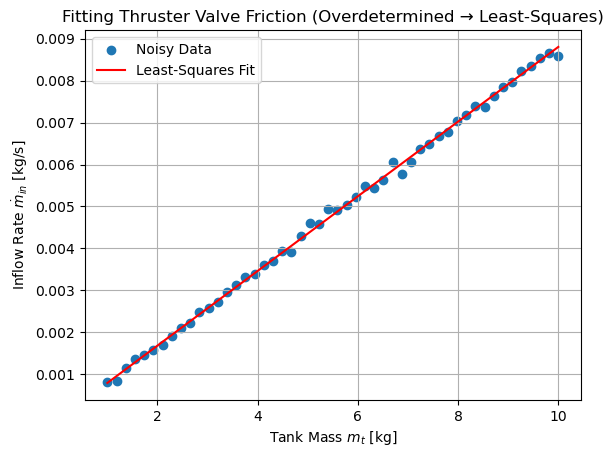

In [25]:
import numpy as np
from scipy.optimize import least_squares

# Generate "experimental" data: m_t vs. m_dot_in (from a true simulation with known C_f_true = 1e-9)
# Simulate true system (simplified linear friction for demo)
C_f_true = 1e-9
num_points = 50
m_t_data = np.linspace(1, 10, num_points)  # Tank masses [kg]
P_t_data = m_t_data * R * T / V_t
P_ch_data = np.full(num_points, 1e5)  # Assume constant chamber P for simplicity
m_dot_in_data = C_f_true * (P_t_data - P_ch_data) + np.random.normal(0, 1e-4, num_points)  # Noisy data

# Residual function for least-squares (overdetermined: more data eqs than params)
def residuals(C_f):
    m_dot_in_pred = C_f[0] * (P_t_data - P_ch_data)
    return m_dot_in_pred - m_dot_in_data

# Fit C_f
res = least_squares(residuals, [1e-10], bounds=(0, np.inf))
C_f_fit = res.x[0]
print(f"Fitted friction coefficient C_f: {C_f_fit:.2e} (true: {C_f_true:.2e})")

# Plot fit
plt.scatter(m_t_data, m_dot_in_data, label='Noisy Data')
m_dot_in_fit = C_f_fit * (P_t_data - P_ch_data)
plt.plot(m_t_data, m_dot_in_fit, 'r-', label='Least-Squares Fit')
plt.xlabel('Tank Mass $m_t$ [kg]')
plt.ylabel('Inflow Rate $\\dot{m}_{in}$ [kg/s]')
plt.title('Fitting Thruster Valve Friction (Overdetermined → Least-Squares)')
plt.legend()
plt.grid(True)
plt.show()

> Feel free to modify the noise level, number of data points, or initial guess for $ C_f $ to see how it affects the fit quality and convergence.

# Summary and conclusions

In this chapter we have learned how to classify models based on their degrees of freedom (DOF) and how to derive models from conservation laws and force balances. We have seen examples of determined, underdetermined and overdetermined problems and how they can be analyzed and solved using numerical methods. Understanding the DOF of a system is crucial for ensuring that the model is well-posed and solvable, and for guiding the development of more complex models in engineering practice.

In the next chapter we will learn about non-linearity and chaos in dynamic systems which is an important topic for understanding the behavior of complex systems over time and the performance of numerical solvers for simulating them.



# Further reading
- Seborg, D. E., Edgar, T. F., & Mellichamp, D. A. (2004). Process Dynamics and Control (2nd ed.). Wiley.
- Sutton & Biblarz, "Rocket Propulsion Elements," 9th ed.